Subentrenamiento, generalización y memorización
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/R-for-predictive-analytics/blob/master/13-regtree-wines.ipynb) para acceder a la última versión online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/R-for-predictive-analytics/blob/master/13-regtree-wines.ipynb) para ver la última versión online en `nbviewer`. 

---
[Licencia](https://github.com/jdvelasq/R-for-predictive-analytics/blob/master/LICENSE)  
[Readme](https://github.com/jdvelasq/R-for-predictive-analytics/blob/master/readme.md)

# CASO 1

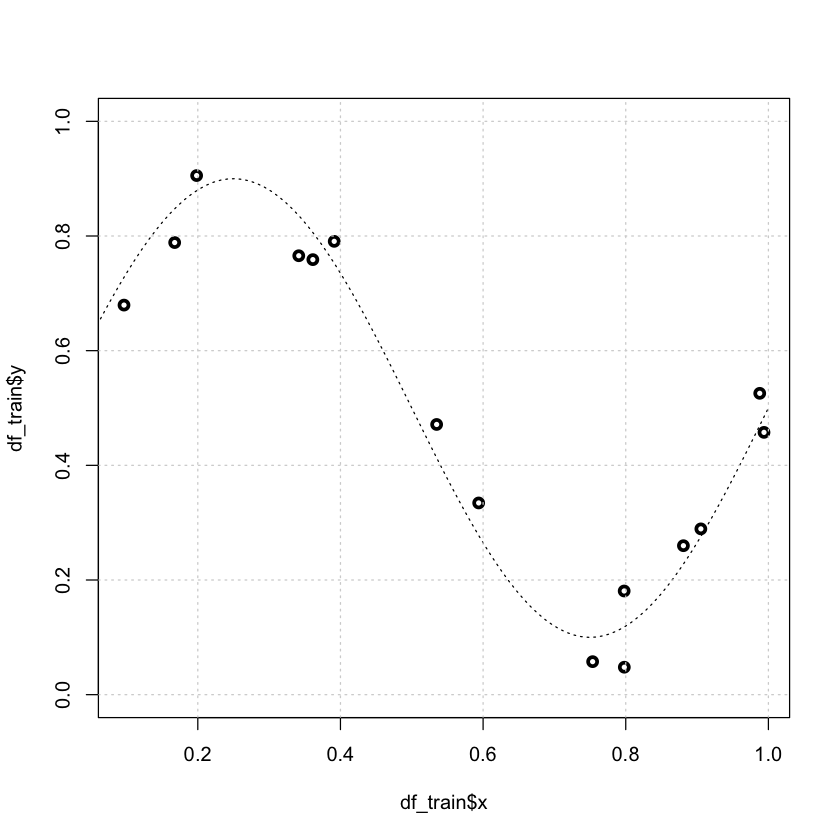

In [3]:
##
## Paso 1: genere un data.frame con los ejemplos
##         de entrenamiento para:
##
##         y = f(x) = 0.5 + 0.4 * sin(2*pi*x)
##
set.seed(123456)


##
## Ejemplos que se ven en la realidad
## con los que se entrena el modelo
##
N = 15                  # número de puntos de entrenamiento
x = runif(N)      # ejemplos
noise = 0.05 * rnorm(N)
df_train = data.frame(x = x, 
                      y = noise + 0.5 + 0.4 * sin(2 * pi * x))

##
## Conjunto de prueba
##
x       = seq(from = 0, to = 1, length.out = 100)
df_test = data.frame(x = x, 
                     y = 0.5 + 0.4 * sin(2 * pi * x))

##
## graficos
## lo que se ve (ejemplos)
##
plot(df_train$x, df_train$y, ylim=c(0,1), lwd = 3) 
lines(df_test$x, df_test$y, lty = 3)         
grid()                                         

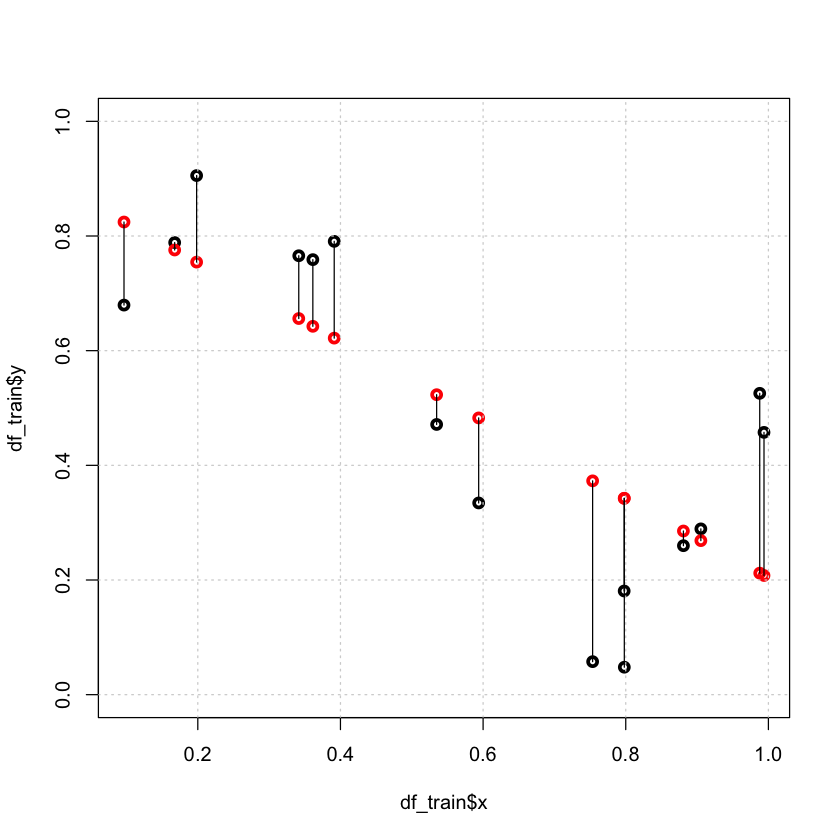

In [32]:
## 
## Paso 2: Ajuste un polinomio de grado uno (una recta) y grafique
##         sobre la figura anterior.
##         Compute el MSE
##

## modelo predictivo
m = lm(y ~ x, data = df_train)

## grafico del modelo predictivo 
## cuando se ajusta
y_train_pred = predict(m, df_train)

plot(df_train$x, df_train$y, ylim=c(0,1), lwd = 3)
points(df_train$x, y_train_pred, col='red', lwd = 3)
grid()

# reto
for(i in 1:N){
    lines(x=c(df_train$x[i], df_train$x[i]), 
          y=c(df_train$y[i], y_train_pred[i]))
}


In [33]:
mse_train = sum((df_train$y - y_train_pred)^2) / N
mse_train


[1] 0.03311958

In [ ]:
##
## Paso 3: Genere 100 puntos igualmente espaciados para x entre 0 y 1.
##         Estos puntos se almacenan en la variable x_test
##         Grafique el polinomio de grado 1 del paso anterior usando
##         estos 100 puntos.
##         Calcule el MSE sobre estos 100 punto
##


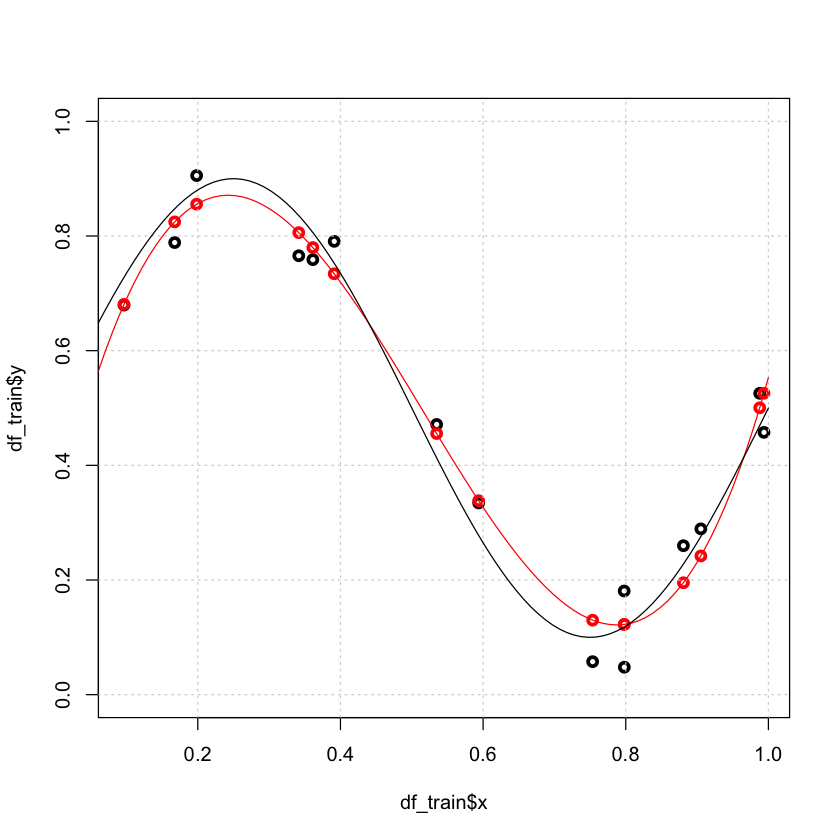

In [42]:
m = lm(y ~ poly(x, 4
               ), data = df_train)
y_train_pred = predict(m, df_train)
y_test_pred = predict(m, df_test)

plot(df_train$x, df_train$y, ylim=c(0,1), lwd = 3)
points(df_train$x, y_train_pred, col='red', lwd = 3)
grid()

lines(df_test$x, y_test_pred, col='red', lwd = 1)
lines(df_test$x, df_test$y, col='black', lwd = 1)

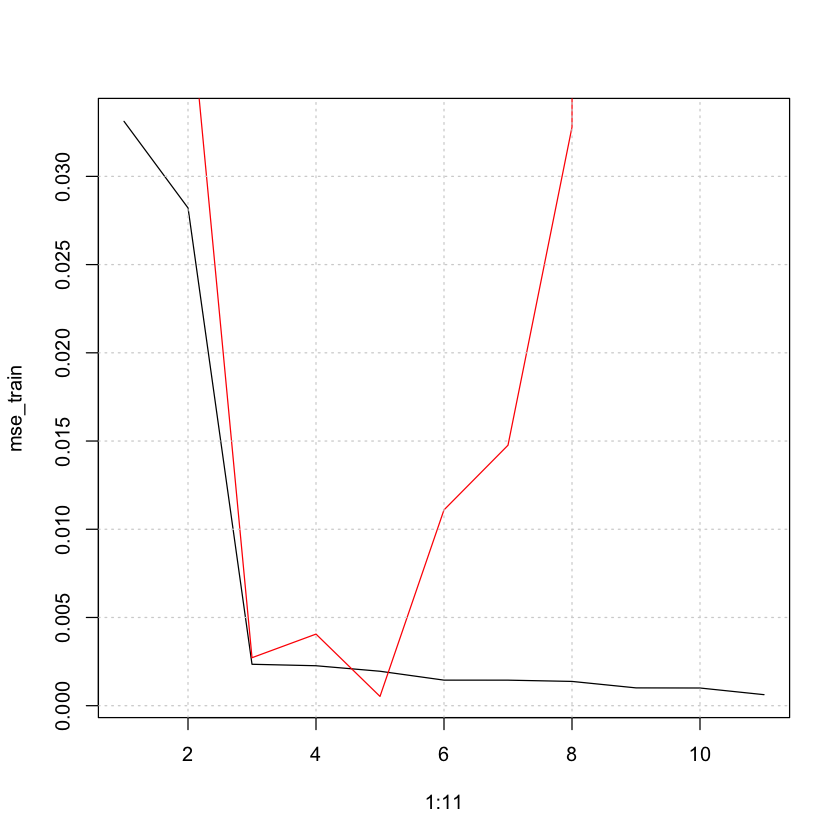

In [24]:
mse_train = rep(0, 11)
mse_test  = rep(0, 11)

for(p in 1:11) 
{
    m = lm(y ~ poly(x, p), data = df_train)
    y_train_pred = predict(m, df_train)
    y_test_pred  = predict(m, df_test)
    mse_train[p] = sum((y_train_pred - df_train$y)^2) / length(df_train$y)
    mse_test[p]  = sum((y_test_pred  - df_test$y)^2)  / length(df_test$y)
}

plot(1:11, mse_train, type = 'l')
lines(1:11, mse_test, type = 'l', col = 'red')
grid()

In [ ]:
##
## Paso 4: Repita el proceso para polinomios de grado 2 hasta 11
##         y almacene los MSE de entrenamiento y prueba en vectores
##         Construya un gráfico en que el eje X corresponde al grado 
##         del polinomio y el eje Y al MSE. Grafique los MSE de 
##         entrenamiento y validación
##


# CASO 2

In [ ]:
##
## Repita el caso anterior con esta nueva secuencia de puntos
##
N = 15
x1 = seq(from = 0, to = 1, length.out = N) 
x2 = seq(from = 0.60, to = 0.99, length.out = N)
x = c(x1, x2)
noise = 0.05 * rnorm(2 * N)
df = data.frame(x = x, y = 0.5 + 0.4 * sin(2 * pi * x + noise))
plot(df$x, df$y)

In [ ]:
c(seq(from = 0, to = 1, length.out = N)) + c(seq(from = 0, to = 1, length.out = N))


---

In [64]:
set.seed(12346)

N = 20            # tamaño de la muestra
x = runif(N)      # ejemplos
noise = 0.05 * rnorm(N)
df_sample = data.frame(x = x, 
                       y = noise + 0.5 + 0.4 * sin(2 * pi * x))

In [92]:
##
## Conjunto de prueba
##
index = sample(1:20, 10)
df_train = df_sample[index,]
df_test  = df_sample[-index,]

##
## real
##
x_real = seq(from = 0, to = 1, length.out = 100)
y_real = 0.5 + 0.4 * sin(2 * pi * x_real)

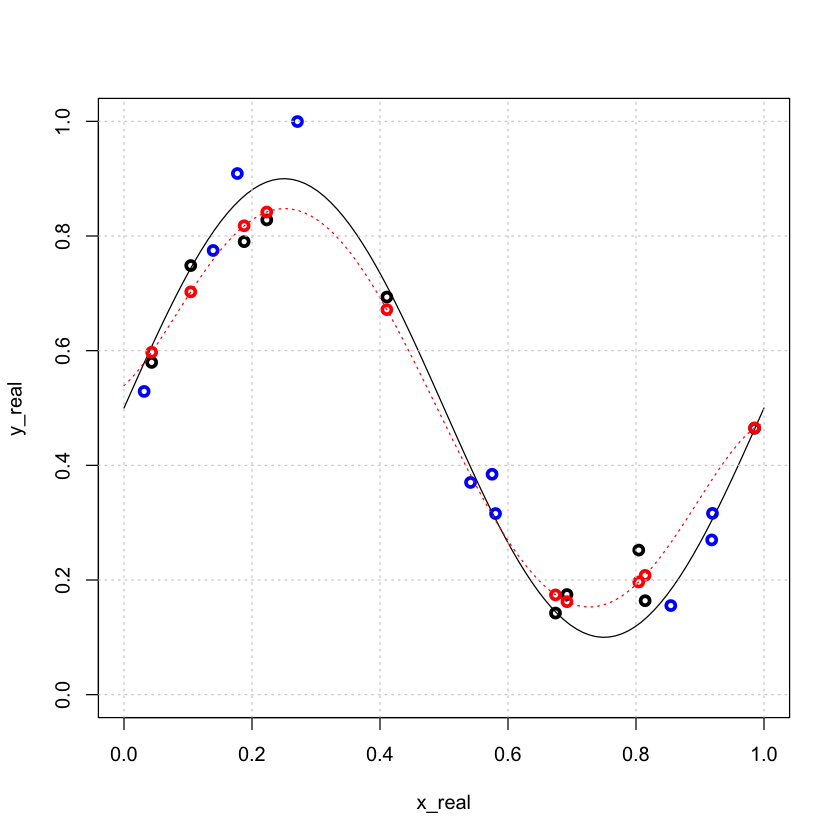

In [94]:
P = 5

m = lm(y ~ poly(x, P), data = df_train)

y_train_pred = predict(m, df_train)
y_test_pred  = predict(m, df_test)

y_model = predict(m, data.frame(x=x_real))

plot(x_real, y_real, type='l', ylim=c(0,1))
points(df_train$x, df_train$y, lwd = 3)
points(df_train$x, y_train_pred, col='red', lwd = 3)

points(df_test$x, df_test$y, col='blue', lwd = 3)
#points(df_test$x, y_test_pred, col='blue', lwd = 3)

lines(x_real, y_model, type = 'l', lty = 3, col='red')
grid()

In [49]:
df_test

,x,y
6,0.19834473,0.88199680
7,0.53485796,0.37633898
8,0.09652624,0.77452195
11,0.79798913,0.08034733
12,0.59379402,0.34050763
13,0.90531001,0.27773611
15,0.99383655,0.50764318
16,0.89595634,0.23537260
17,0.87864335,0.22453492
18,0.19760575,0.91376410
